In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
import scipy.stats as st
import random
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [103]:
data = pd.read_csv(r"/content/plant_vase1.CSV")
data.head()

,year,month,day,hour,minute,second,moisture0,moisture1,moisture2,moisture3,moisture4,irrgation
0,2020,3,6,22,16,11,0.70,0.64,0.73,0.40,0.02,False
1,2020,3,6,22,17,11,0.70,0.64,0.71,0.39,0.02,False
2,2020,3,6,22,18,11,0.69,0.63,0.70,0.39,0.02,False
3,2020,3,6,22,19,11,0.69,0.63,0.70,0.39,0.02,False
4,2020,3,6,22,20,12,0.69,0.62,0.69,0.39,0.02,False


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       4117 non-null   int64  
 1   month      4117 non-null   int64  
 2   day        4117 non-null   int64  
 3   hour       4117 non-null   int64  
 4   minute     4117 non-null   int64  
 5   second     4117 non-null   int64  
 6   moisture0  4117 non-null   float64
 7   moisture1  4117 non-null   float64
 8   moisture2  4117 non-null   float64
 9   moisture3  4117 non-null   float64
 10  moisture4  4117 non-null   float64
 11  irrgation  4117 non-null   bool   
dtypes: bool(1), float64(5), int64(6)
memory usage: 358.0 KB


In [105]:
data.describe()


,year,month,day,hour,minute,second,moisture0,moisture1,moisture2,moisture3,moisture4
count,4117.0,4117.0,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000
mean,2020.0,3.0,7.885839,11.109060,29.461744,31.570318,0.444190,0.652142,0.679390,0.325732,0.020816
std,0.0,0.0,0.844629,6.827032,17.315045,16.107940,0.149481,0.022218,0.048444,0.197201,0.002738
min,2020.0,3.0,6.000000,0.000000,0.000000,0.000000,0.170000,0.600000,0.580000,0.080000,0.020000
25%,2020.0,3.0,7.000000,5.000000,14.000000,19.000000,0.330000,0.630000,0.640000,0.110000,0.020000
50%,2020.0,3.0,8.000000,11.000000,29.000000,33.000000,0.490000,0.650000,0.700000,0.330000,0.020000
75%,2020.0,3.0,9.000000,17.000000,44.000000,45.000000,0.560000,0.670000,0.720000,0.530000,0.020000
max,2020.0,3.0,9.000000,23.000000,59.000000,59.000000,0.700000,0.690000,0.740000,0.600000,0.030000


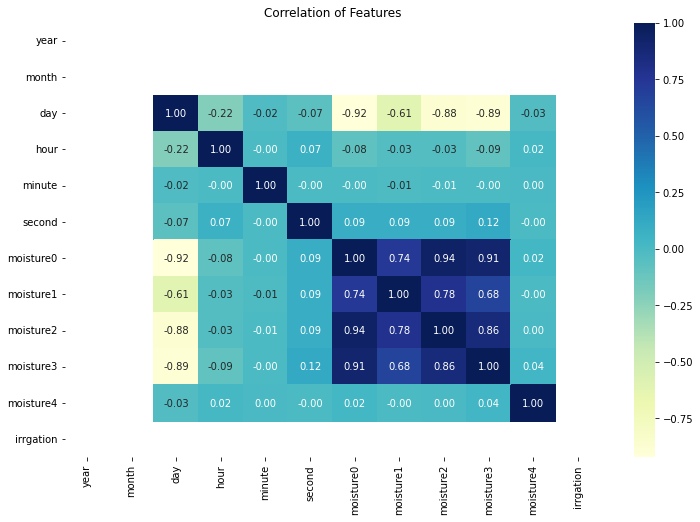

In [106]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr,cmap='YlGnBu',annot=True,fmt=".2f",ax=ax)
plt.title("Correlation of Features")
plt.show() 

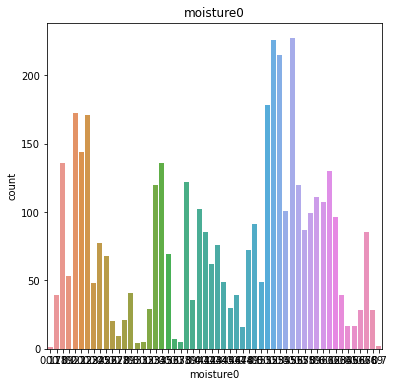

In [107]:
plt.figure(figsize=(6,6))
sns.countplot(x='moisture0', data=data)
plt.title('moisture0')
plt.show()  

In [108]:
#Removing Outliers
cols =['moisture0','Moisture'] # one or more

Q1 = data['moisture0'].quantile(0.25)
Q3 = data['moisture0'].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data['moisture0'] < (Q1 - 1.5 * IQR)) |(data['moisture0'] > (Q3 + 1.5 * IQR)))]
print(data)


      year  month  day  hour  minute  second  moisture0  moisture1  moisture2  \
0     2020      3    6    22      16      11       0.70       0.64       0.73   
1     2020      3    6    22      17      11       0.70       0.64       0.71   
2     2020      3    6    22      18      11       0.69       0.63       0.70   
3     2020      3    6    22      19      11       0.69       0.63       0.70   
4     2020      3    6    22      20      12       0.69       0.62       0.69   
...    ...    ...  ...   ...     ...     ...        ...        ...        ...   
4112  2020      3    9    19      12      49       0.18       0.62       0.60   
4113  2020      3    9    19      13      49       0.18       0.62       0.59   
4114  2020      3    9    19      14      49       0.18       0.62       0.59   
4115  2020      3    9    19      15      49       0.18       0.62       0.60   
4116  2020      3    9    19      16      49       0.18       0.63       0.60   

      moisture3  moisture4 

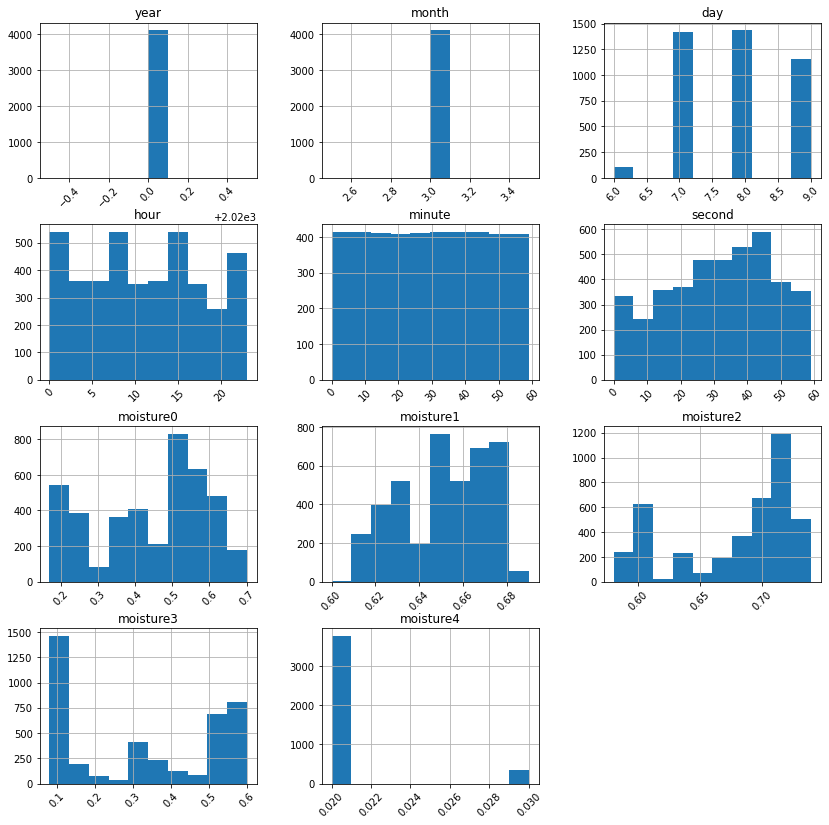

In [124]:
data.hist(figsize=(14,14), xrot=45)
plt.show()

In [109]:
x =data.loc[:, data.columns != 'moisture4']
y =data.loc[:, data.columns == 'moisture4']
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

In [110]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_train,y_train)
clf.score(x_test, y_test)

0.006197853944341358

In [111]:
data1 = pd.read_csv(r"/content/plant_vase2.CSV")
data1.head()

,year,month,day,hour,minute,second,moisture0,moisture1,moisture3,moisture4,Moisture
0,2020,3,11,14,44,39,0.59,0.63,0.45,0.01,0
1,2020,3,11,14,47,9,0.56,0.60,0.48,0.01,0
2,2020,3,11,14,49,39,0.56,0.54,0.51,0.01,0
3,2020,3,11,14,52,9,0.56,0.50,0.51,0.01,0
4,2020,3,11,14,54,39,0.57,0.53,0.51,0.01,0


In [121]:
X =data1.loc[:, data1.columns == 'moisture0']
Y =data1.loc[:, data1.columns == 'Moisture']
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=0)

Y_train

,Moisture
445,1
8577,1
10020,1
4255,1
2761,1
...,...
9225,1
4859,1
3264,1
9845,1


In [122]:
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, Y_train)
y_pred= classifier.predict(X_test)  
sv4=metrics.accuracy_score(Y_test,y_pred)
sv4

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9938451571104633

In [123]:
#Decision Tree For 4th Dataset
d= DecisionTreeClassifier(max_depth=3)
dd =d.fit(X_train, Y_train)
p= dd.predict(X_test)
dt4=metrics.accuracy_score(Y_test,p)
dt4

0.9987042436022028